In [573]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [574]:
data = pd.read_csv('data.csv')


In [575]:
data.head()

,X,Y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [576]:
plt.rcParams['figure.figsize'] = [10, 5]

Text(0.5, 1.0, 'Data (x,y)')

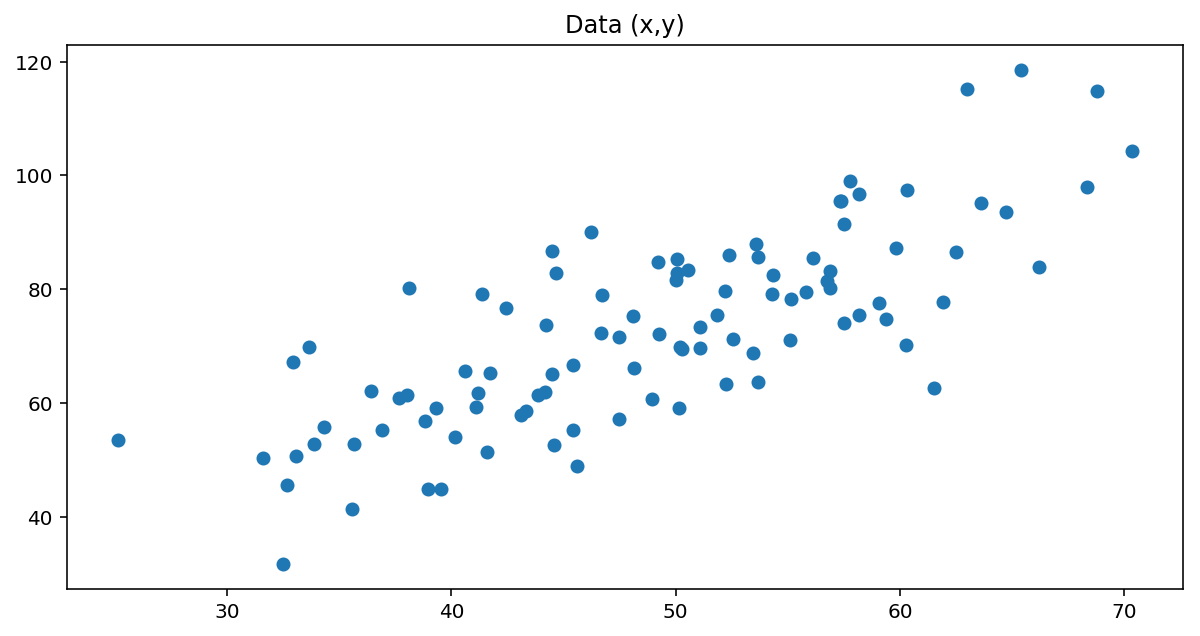

In [577]:
plt.scatter(data.X,data.Y)
plt.xlabel="X values"
plt.ylabel="Y values"
plt.title("Data (x,y)")

In [578]:
def plot_line(slope,intercept):
    x_vals = np.arange(0,70,0.01)
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

In [579]:
def calculate_error(slope,intercept,x_values,y_values):
    total_number_of_points = len(x_values)
    total_error = 0
    for (x,y) in zip(x_values,y_values):
        y_pred = slope*x + intercept
        difference_square = (y-y_pred)**2
        total_error += difference_square
    return total_error/total_number_of_points
        

In [580]:
def gradient_descent(slope,intercept,x_values,y_values,learning_rate,iteration):
    (new_slope,new_intercept) = (slope,intercept)
    gradient_of_slope = 0
    gradient_of_intercept = 0
    for i in range(iteration):
        for (x,y) in zip(x_values,y_values):
            gradient_of_slope += ((new_slope*x + new_intercept) - y)*x
            gradient_of_intercept += ((new_slope*x + new_intercept) - y)
        new_slope = new_slope - ((learning_rate*gradient_of_slope)/len(x_values))
        new_intercept = new_intercept - ((learning_rate*gradient_of_intercept)/len(x_values))
        plot_line(new_slope,new_intercept)
        plt.scatter(data.X,data.Y)
    return (new_intercept,new_slope)

In [581]:
#Getting X and Y Values
x_values = data.X
y_values = data.Y

In [582]:
#Setting HyperParameters
learning_rate = 0.00001
iteration = 10
(b,m) = np.random.rand(2)
print((b,m))

(0.08314341330774977, 0.7726760593642227)


In [583]:
initial_slope = m
initial_intercept = b

Initial Error: 1351.3188982395025 and Final Error: 122.33428044029066
Slope: 1.5400392028360204 and Intercept: 0.09838961548052501 after 10 iterations 


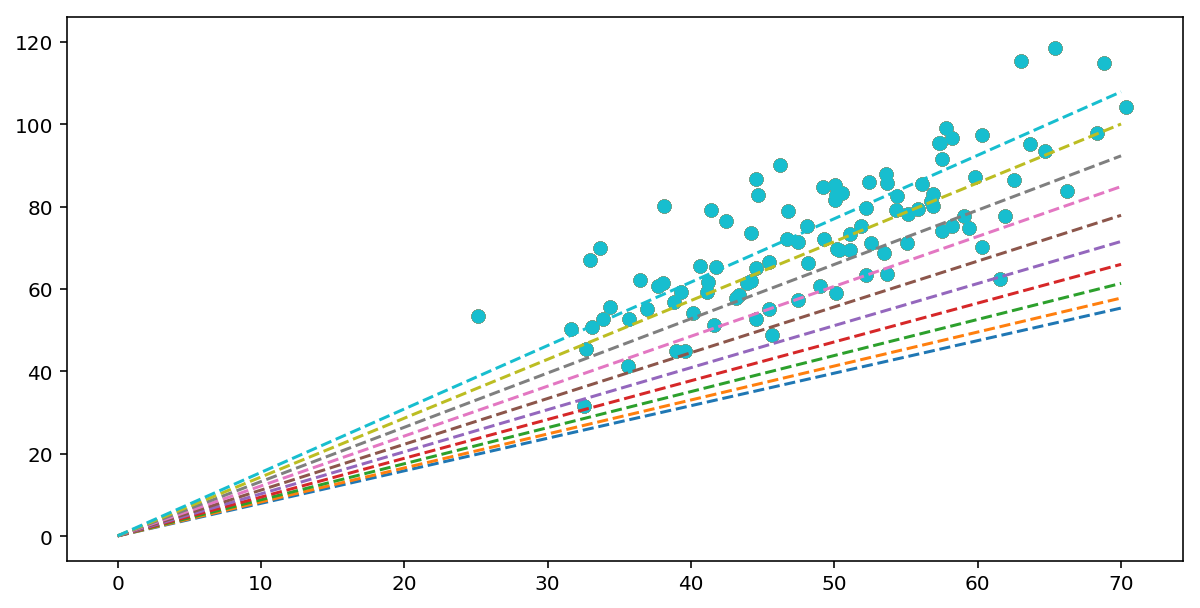

In [584]:
initial_error = calculate_error(initial_slope,initial_intercept,x_values,y_values)
(b,m) = gradient_descent(initial_slope,initial_intercept,x_values,y_values,learning_rate,iteration)
(final_intercept,final_slope) = (b,m)
final_error = calculate_error(final_slope,final_intercept,x_values,y_values)

error_summary = "Initial Error: {} and Final Error: {}"
final_slope_and_intercept = "Slope: {} and Intercept: {} after {} iterations "
print(error_summary.format(initial_error,final_error))
print(final_slope_and_intercept.format(final_slope,final_intercept,iteration))